# Importing Initial Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data which is in excel format

df_train=pd.read_excel("Restaurant_Food_Cost_Train.xlsx")

df_train.head()
# for getting overview of our data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
df_train.shape

(12690, 9)

In [4]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [7]:
# to treat null values, i am filling it with its forward item.

df_train=df_train.fillna(method="ffill")

In [8]:
df_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

No null value left now

In [9]:
# lets check how many unique values are there in each column.

df_train.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

In [10]:
df_train["CITY"].value_counts().head(15)

Chennai         2188
Bangalore       2170
Hyderabad       1826
Mumbai          1740
New Delhi       1334
Kochi           1291
Gurgaon          385
Secunderabad     314
Noida            212
Navi Mumbai      165
Ghaziabad        102
Thane            101
Faridabad         81
Bandra West       71
Thane West        53
Name: CITY, dtype: int64

In [11]:
df_train["LOCALITY"].value_counts().head(15)

Gachibowli       166
Indiranagar      138
Kakkanad         124
Edappally        123
HSR              122
Madhapur         117
Kukatpally       117
Marathahalli     116
Jubilee Hills    115
Banjara Hills    113
Whitefield       111
Fort Kochi       103
BTM               99
Jayanagar         96
Nungambakkam      94
Name: LOCALITY, dtype: int64

In [12]:
df_train["CUISINES"].value_counts().head(20)

South Indian                           532
North Indian                           526
North Indian, Chinese                  501
Fast Food                              286
Chinese                                167
Bakery, Desserts                       148
Bakery                                 148
South Indian, North Indian, Chinese    139
Cafe                                   134
Kerala                                 131
Biryani                                129
Street Food                            121
Chinese, North Indian                  119
South Indian, North Indian             106
North Indian, Mughlai                  102
North Indian, Chinese, Biryani          91
Desserts                                87
North Indian, South Indian, Chinese     87
Finger Food                             87
Ice Cream, Desserts                     81
Name: CUISINES, dtype: int64

In [13]:
# Looking how many types of restaurants are there in data

df_train["TITLE"].value_counts().head(15)

QUICK BITES           4218
CASUAL DINING         3652
None                  1003
CAFÉ                   607
DESSERT PARLOR         382
CASUAL DINING,BAR      349
FINE DINING            308
BAKERY                 302
BEVERAGE SHOP          156
BAR,CASUAL DINING      128
LOUNGE                  98
BAKERY,QUICK BITES      92
BAR                     91
FOOD COURT              78
CASUAL DINING,CAFÉ      56
Name: TITLE, dtype: int64

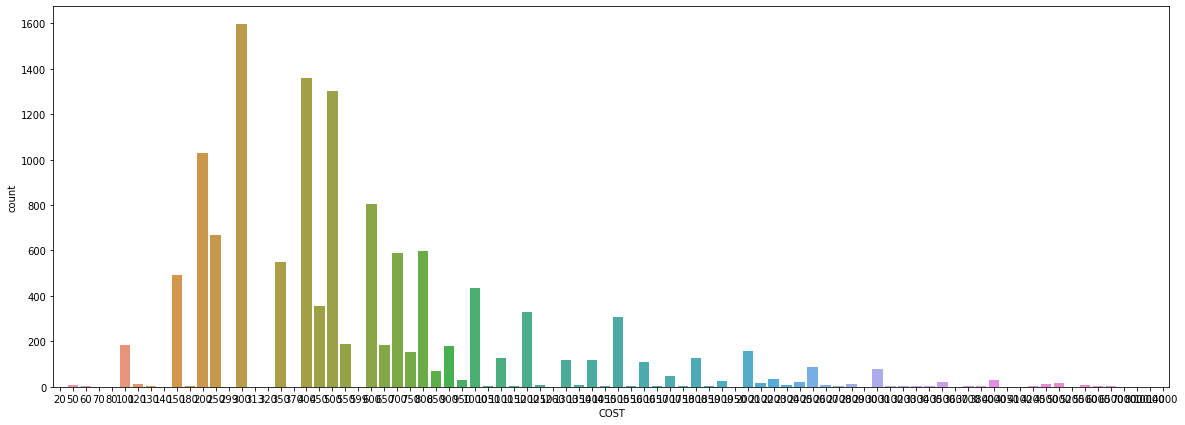

In [14]:
plt.figure(figsize=(20,7))

sns.countplot(df_train["COST"])

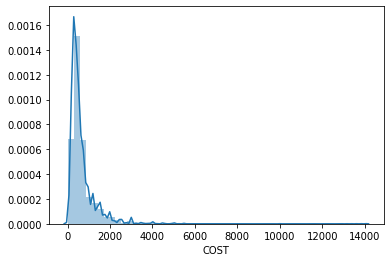

In [15]:
sns.distplot(df_train["COST"])

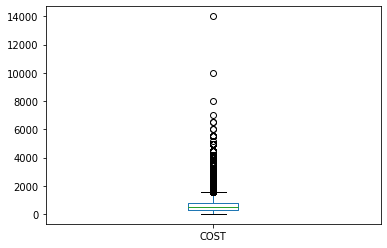

In [16]:
df_train["COST"].plot.box()

we can see here that there are outliers in cost column of data so lets remove outliers after conerting the data type for each colum,

In [17]:
# importing library to encode string varibles into integers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_train["TITLE"]=le.fit_transform(df_train["TITLE"])
df_train["CUISINES"]=le.fit_transform(df_train["CUISINES"])
df_train["LOCALITY"]=le.fit_transform(df_train["LOCALITY"])
df_train["RATING"]=le.fit_transform(df_train["RATING"])

In [18]:
df_train.dtypes

TITLE             int32
RESTAURANT_ID     int64
CUISINES          int32
TIME             object
CITY             object
LOCALITY          int32
RATING            int32
VOTES            object
COST              int64
dtype: object

In [19]:
# lets remove seems column which seems to be useless for know.

df_train.drop(["RESTAURANT_ID","TIME","CITY","VOTES"],axis=1,inplace=True)
df_train.head()

,TITLE,CUISINES,LOCALITY,RATING,COST
0,31,2627,285,17,1200
1,33,289,1046,23,1500
2,31,2976,1101,19,800
3,95,4130,136,22,800
4,50,1766,620,19,300


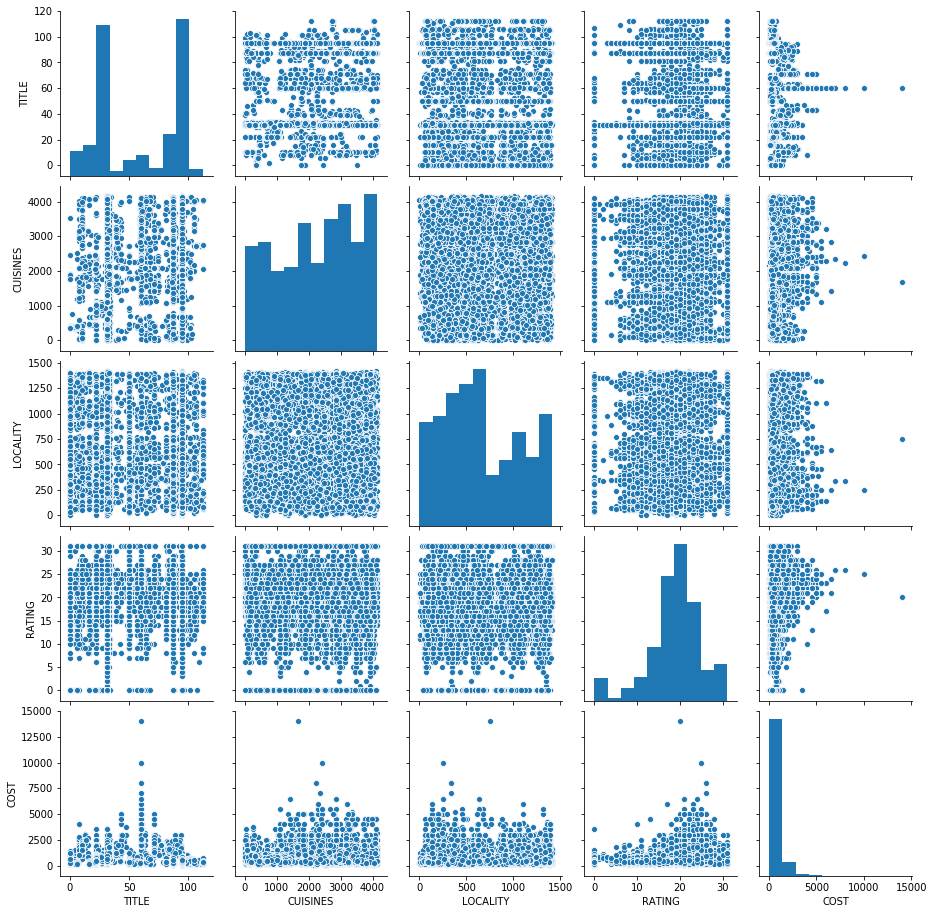

In [21]:
sns.pairplot(df_train)

In [23]:
from scipy.stats import zscore
z=abs(zscore(df_train))
print(df_train.shape)                     # old shape
df_new=df_train.loc[(z<3).all(axis=1)]
print(df_new.shape)                       # New shape

(12690, 5)
(11972, 5)


So we can see that there are around 700 outliers whic are now removed

In [24]:
df_new.skew()

TITLE      -0.071799
CUISINES   -0.216128
LOCALITY    0.329347
RATING      0.143523
COST        1.737557
dtype: float64

C:\Users\Amit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


-0.6561687927322579


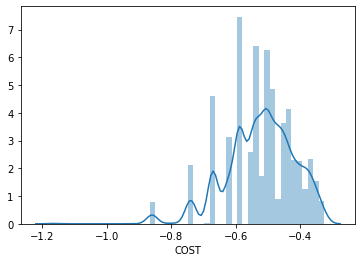

In [32]:
# here cost column is bit skewed as it is more then recommended value of 0.55, so lets treat it with log function.

df_new["COST"]=np.log(df_new["COST"])

print(df_new["COST"].skew())
sns.distplot(df_new["COST"])


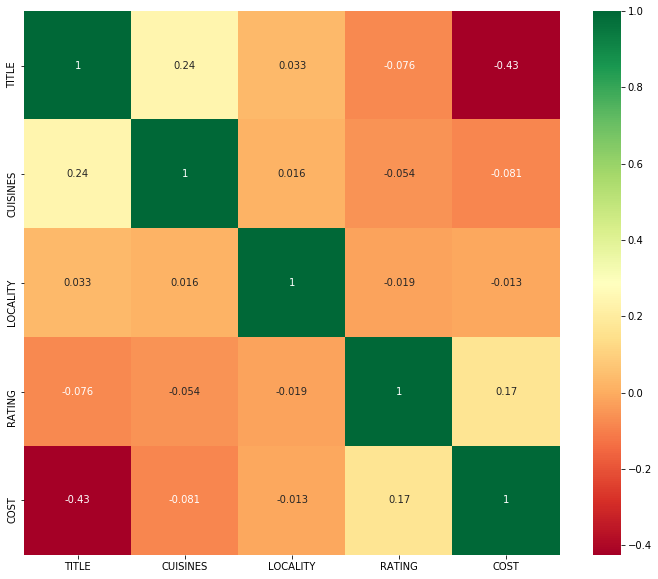

In [33]:
# Finds correlation between each other

plt.figure(figsize = (12,10))

sns.heatmap(df_new.corr(),annot=True,cmap = "RdYlGn")

Here we see that COST is positively correlate only to RATING.

In [34]:
# Lets divide the data in to  input and target variables

x=df_new.drop(["COST"],axis=1)

y=df_new["COST"]

# Importing Libraries for model selection

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


# TRAIN TEST SPLIT

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9577, 4)
(9577,)
(2395, 4)
(2395,)


In [37]:
# for finding best random state  as parameter

max_r_score=0
for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        y_pred = lr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
print("Max r2 score corresponding to ",final_r_state," is",max_r_score)

r2_score corresponding to random state  42 is:  0.21448886461143768
r2_score corresponding to random state  43 is:  0.21477243774517407
r2_score corresponding to random state  44 is:  0.19580883723346254
r2_score corresponding to random state  45 is:  0.17896107053359944
r2_score corresponding to random state  46 is:  0.18584167386005568
r2_score corresponding to random state  47 is:  0.19018173456338539
r2_score corresponding to random state  48 is:  0.21261638431407237
r2_score corresponding to random state  49 is:  0.1959500202568224
r2_score corresponding to random state  50 is:  0.1941711481088496
r2_score corresponding to random state  51 is:  0.22042029118531747
r2_score corresponding to random state  52 is:  0.20104354087669074
r2_score corresponding to random state  53 is:  0.18830286539893604
r2_score corresponding to random state  54 is:  0.17286670653322544
r2_score corresponding to random state  55 is:  0.17944451316555088
r2_score corresponding to random state  56 is:  0.

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=88)

In [39]:
LR=LinearRegression()
LS=Lasso(random_state=88)
RD=Ridge(random_state=88)
KNR=KNeighborsRegressor()
SV=SVR()
DTR=DecisionTreeRegressor(random_state=88)
RFR=RandomForestRegressor(random_state=88)
GBR=GradientBoostingRegressor(random_state=88)
ABR=AdaBoostRegressor(random_state=88)

In [40]:
models = []
models.append(('LinearRegression', LR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('KNeighborseRegressor',KNR))
models.append(('SVR', SV))
models.append(('DecisionTreeRegressor', DTR))
models.append(('RandomForestRegressor', RFR))
models.append(('GradientBoostingRegressor', GBR))
models.append(('AdaBoostRegressor',ABR))

In [41]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    
    r2_scr=r2_score(y_test,pred)
    print('R2_score = ',r2_scr)
    R2_score.append(r2_scr)
    
    mse=mean_squared_error(y_test,pred)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Root Mean Square Error = ",rmse)
    RMSE.append(rmse) 
    
    
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.2342957323724154
Mean_Squared_Error = 0.008450041173759179
Root Mean Square Error =  0.09192410550970392
Cross_Val_Score =  0.19898047349851494



********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=88,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.09598017769180944
Mean_Squared_Error = 0.009976442659862576
Root Mean Square Error =  0.09988214384895118
Cross_Val_Score =  0.09213303742862193



********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=88, solver='auto', tol=0.001)
R2_score =  0.23429569611923962


In [43]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Root Mean Square Error': RMSE, 'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Root Mean Square Error,Cross_val_score
0,LinearRegression,0.234296,0.008450,0.091924,0.198980
1,Lasso,0.095980,0.009976,0.099882,0.092133
2,Ridge,0.234296,0.008450,0.091924,0.198980
3,KNeighborseRegressor,0.396685,0.006658,0.081596,0.387595
4,SVR,0.294446,0.007786,0.088240,0.280194
5,DecisionTreeRegressor,0.224307,0.008560,0.092522,0.280409
6,RandomForestRegressor,0.577852,0.004659,0.068254,0.580589
7,GradientBoostingRegressor,0.583752,0.004594,0.067776,0.573891
8,AdaBoostRegressor,0.199794,0.008831,0.093972,0.029369


From here we can select Gradient Boosting regressor as our final model as it has highest r2_score and lowest errors.

In [44]:
# for saving our model

from sklearn.externals import joblib
joblib.dump(GBR,"Restaurant_Food_Cost.obj")

C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Restaurant_Food_Cost.obj']

In [45]:
# testing our model

model=joblib.load("Restaurant_Food_Cost.obj")
model.predict(x_test)

array([-0.37461412, -0.55605483, -0.49064886, ..., -0.55698254,
       -0.4404374 , -0.55366096])

# Complete